In [2]:
import pandas as pd
import numpy as np
from subprocess import check_output
from operator import itemgetter
import matplotlib as mpl
%matplotlib inline
from itertools import cycle, islice
import matplotlib.pyplot as plt

# Top 40 categories in the business

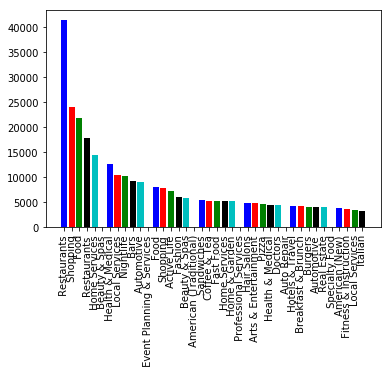

In [3]:
from itertools import cycle, islice
Categories={}

business=pd.read_csv("business.csv")

#get count for all the categories in the business
for _categories in business.categories:
    all_categories=str(_categories).split(",")
    for cat in all_categories:
        if cat not in Categories:
            Categories[cat]=1
        else:
            Categories[cat]+=1
            
All_categories=list(Categories.keys())

Cat_list=[[x,Categories[x]] for x in All_categories]
#Sort the category list in descedning order
Cat_list=sorted(Cat_list, key=lambda x: x[1], reverse=True)
Cat_list=Cat_list[:40]
my_colors = list(islice(cycle(['b', 'r', 'g', 'k','c','w']), None, len(Cat_list)))
plt.bar(range(len(Cat_list)),[x[1] for x in Cat_list] ,align="center",color=my_colors)
plt.xticks(range(len(Cat_list)), [x[0] for x in Cat_list], rotation="vertical")
plt.show()

# Count of stars for all businesses

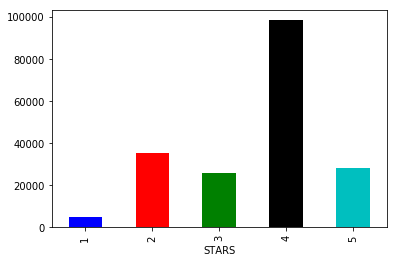

In [4]:
from itertools import cycle, islice

stars=[]

for i,x in business.iterrows():
    stars.append(int(round(x["stars"])))
    
stars=pd.DataFrame(stars)
stars.columns=["STARS"]
my_colors = list(islice(cycle(['b', 'r', 'g', 'k','c','w']), None, len(stars)))
stars["STARS"].groupby(stars["STARS"]).count().plot(kind="bar", sort_columns=True,color=my_colors)



# Most common day for a checkin

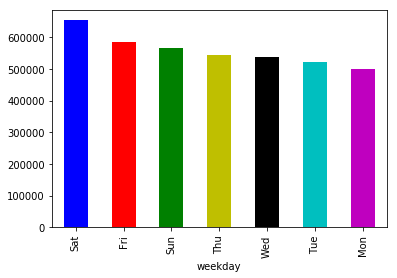

In [5]:
from itertools import cycle, islice
checkins=pd.read_csv("checkin.csv")
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k','c','m']), None, len(checkins)))


checkins.weekday.groupby(checkins.weekday).count().sort_values()[::-1].plot(kind="bar",color=my_colors)


# Business with most number of checkins on yelp

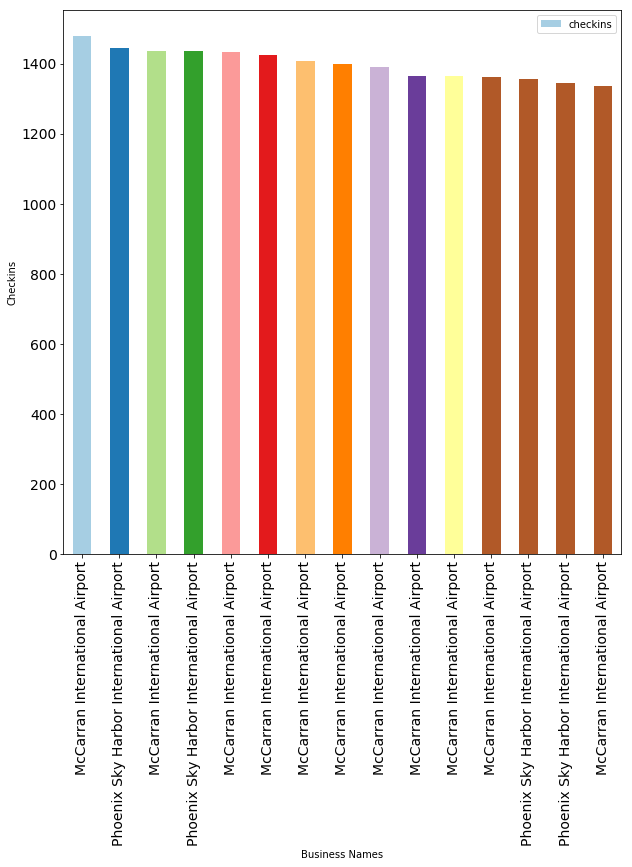

In [9]:
#sort the checkins in descending order
checkins=checkins.sort_values(by="checkins", ascending=False)[:15]
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k','c','m']), None, len(checkins)))

#Inner join business and checkin dataframes
b_c = pd.merge(business,checkins, how='inner', on=['business_id'])
b_c = b_c.sort_values(by="checkins", ascending=False)

bGraph = b_c[['checkins']].plot(kind='bar',figsize=(10,10),legend=True, fontsize=14, color=[plt.cm.Paired(np.arange(len(checkins)))])
bGraph.set_xticklabels(b_c.name, rotation=90)
bGraph.set_xlabel("Business Names",fontsize=10)
bGraph.set_ylabel("Checkins",fontsize=10)
plt.show()

# Number of reviews according to stars

In [7]:
from itertools import cycle, islice

stars=[]
reviews = pd.read_csv('review.csv', engine='python', encoding='utf-8', error_bad_lines=False)

Skipping line 2554616: unexpected end of data


In [8]:
reviews.size

22991526

In [10]:
review = reviews[:50000]

In [13]:
review.to_csv("review_modified.csv")

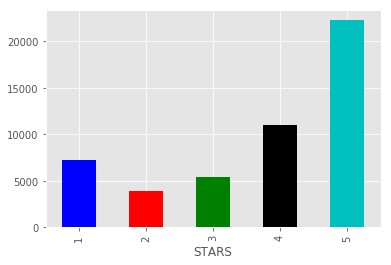

In [126]:
for i,x in review.iterrows():
    stars.append(int(round(x["stars"])))
    
stars=pd.DataFrame(stars)
stars.columns=["STARS"]
my_colors = list(islice(cycle(['b', 'r', 'g', 'k','c','w']), None, len(stars)))
stars["STARS"].groupby(stars["STARS"]).count().plot(kind="bar", sort_columns=True,color=my_colors)